In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv("recent-grads.csv")

print(recent_grads.iloc[0])
print(recent_grads.head())
print(recent_grads.tail())
print(recent_grads.describe())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

/dataquest/system/env/python3/lib/python3.4/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [2]:
raw_data_count = len(recent_grads)
recent_grads.dropna(inplace=True)
cleaned_data_count = len(recent_grads)
print(raw_data_count),print(cleaned_data_count)

173
172


(None, None)

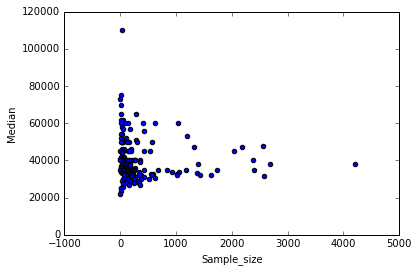

In [3]:
recent_grads.plot(x="Sample_size", y="Median", kind="scatter")

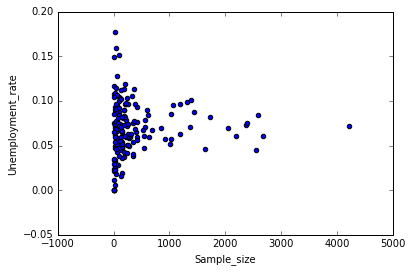

In [4]:
recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind="scatter")

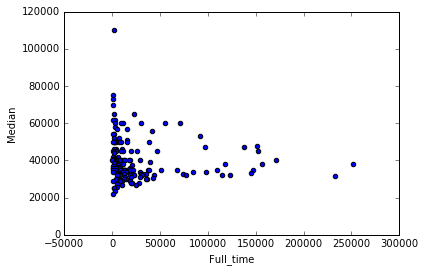

In [5]:
recent_grads.plot(x="Full_time", y="Median", kind="scatter")

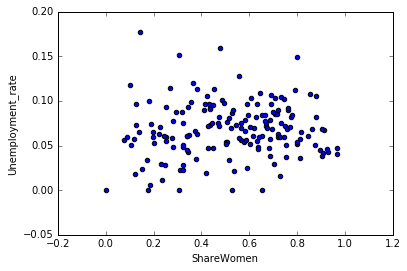

In [6]:
recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter")

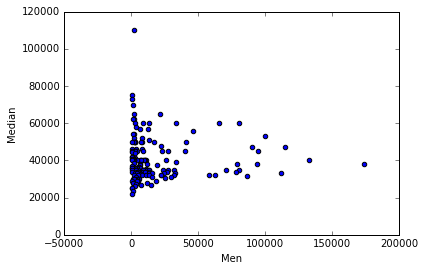

In [7]:
recent_grads.plot(x="Men", y="Median", kind="scatter")

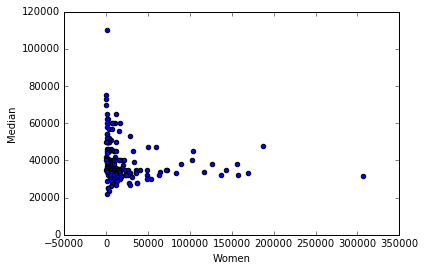

In [8]:
recent_grads.plot(x="Women", y="Median", kind="scatter")

297.0
1.1511627907
3657.17171717


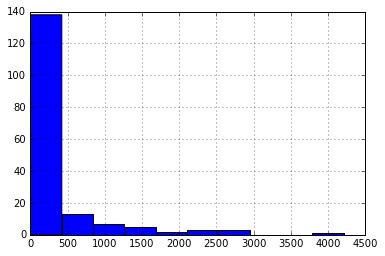

In [9]:
iqr = np.subtract(*np.percentile(recent_grads["Sample_size"], [75, 25]))
print(iqr)
h = 2 * iqr * len(recent_grads) ** -1/3
print(h)
bins = (recent_grads["Sample_size"].max() - recent_grads["Sample_size"].min()) / h
print(bins)
recent_grads["Sample_size"].hist(bins=10)

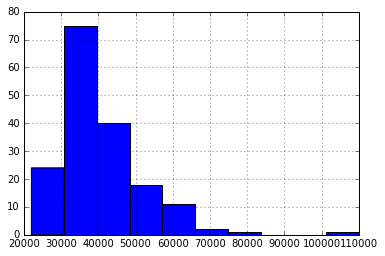

In [10]:
recent_grads["Median"].hist(bins=10)

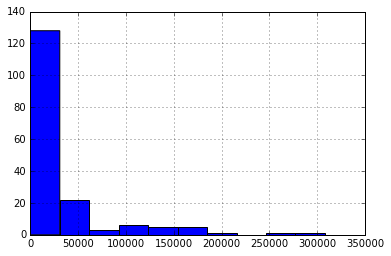

In [11]:
recent_grads["Employed"].hist(bins=10)

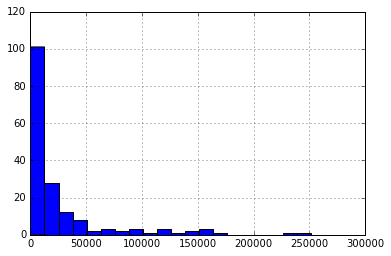

In [12]:
recent_grads["Full_time"].hist(bins=20)

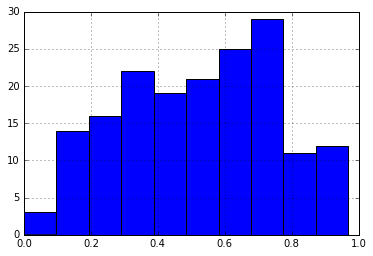

In [13]:
recent_grads["ShareWomen"].hist(bins=10)

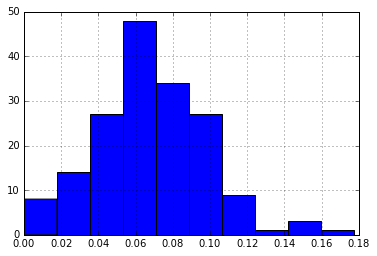

In [14]:
recent_grads["Unemployment_rate"].hist(bins=10)

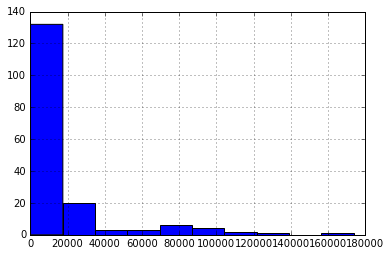

In [15]:
recent_grads["Men"].hist(bins=10)

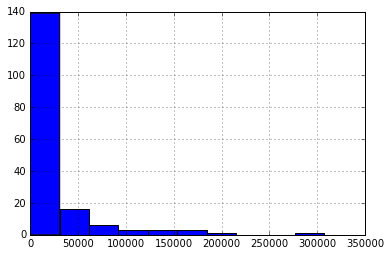

In [16]:
recent_grads["Women"].hist(bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f81c86540b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8197299898>]], dtype=object)

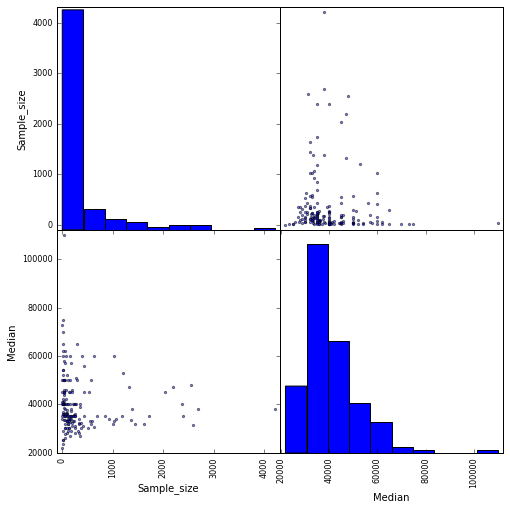

In [17]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(recent_grads[["Sample_size","Median"]], figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8197351ba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8196f99ba8>]], dtype=object)

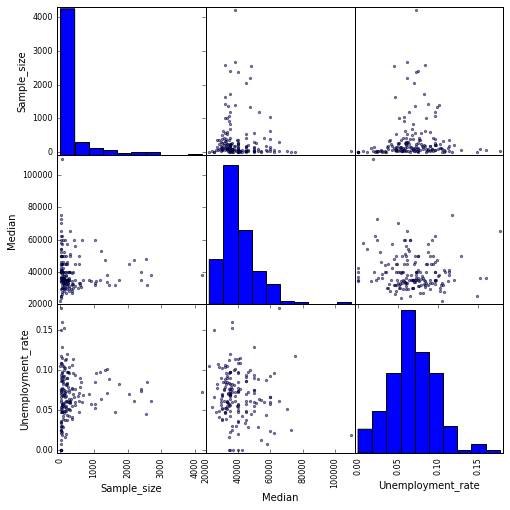

In [18]:
scatter_matrix(recent_grads[["Sample_size","Median","Unemployment_rate"]], figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f819732bfd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8196e0d358>]], dtype=object)

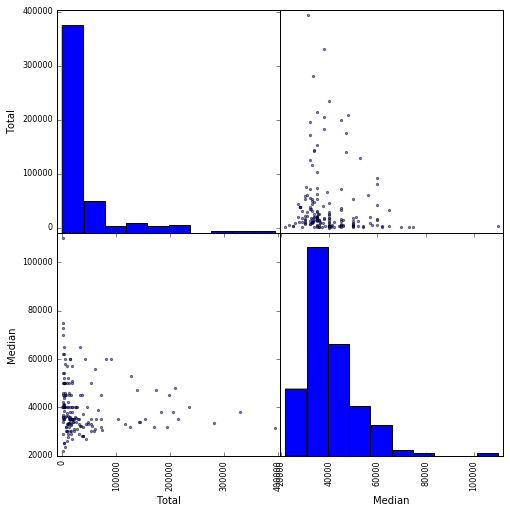

In [19]:
scatter_matrix(recent_grads[["Total","Median"]], figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8196d3e080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8196c322e8>]], dtype=object)

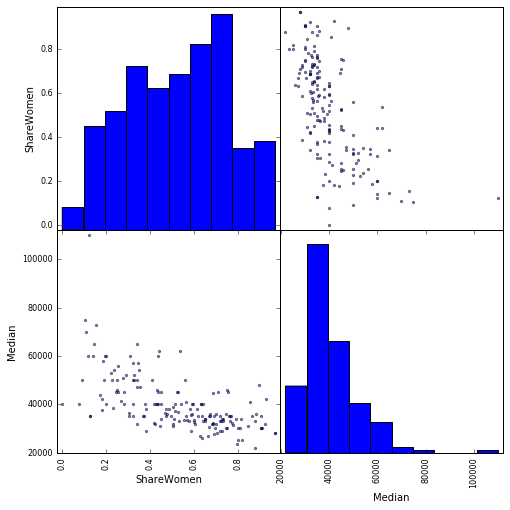

In [20]:
scatter_matrix(recent_grads[["ShareWomen","Median"]], figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8196c6abe0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8196ad51d0>]], dtype=object)

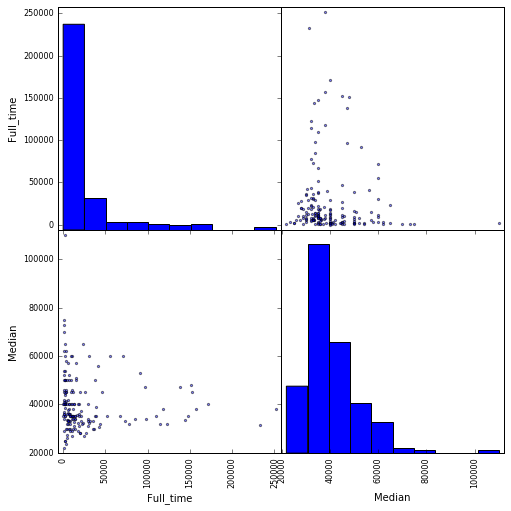

In [21]:
scatter_matrix(recent_grads[["Full_time","Median"]],figsize=(8,8))

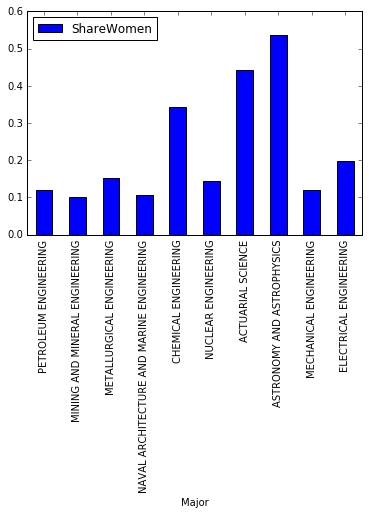

In [22]:
recent_grads[:10].plot.bar(x="Major",y="ShareWomen")

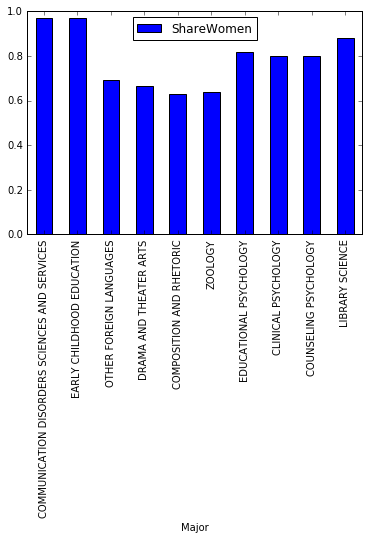

In [23]:
recent_grads[-10:].plot.bar(x="Major",y="ShareWomen")

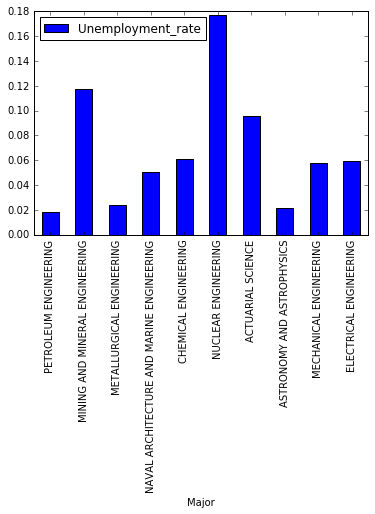

In [24]:
recent_grads[:10].plot.bar(x="Major",y="Unemployment_rate")

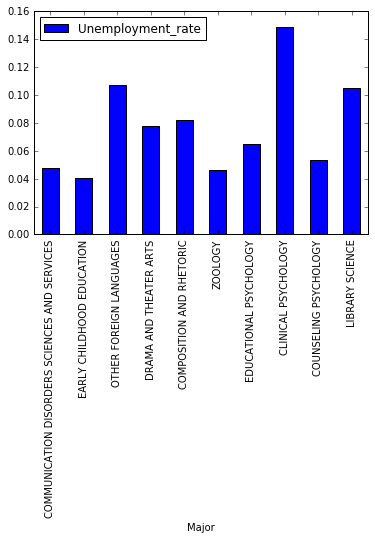

In [25]:
recent_grads[-10:].plot.bar(x="Major",y="Unemployment_rate")

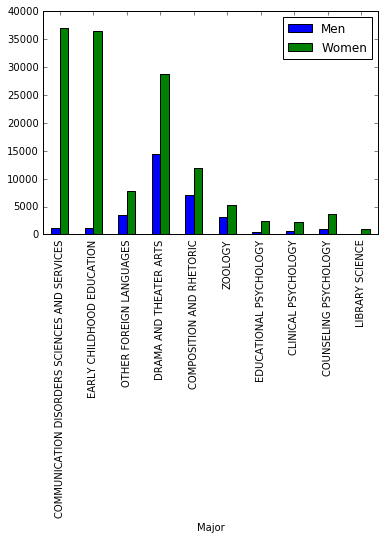

In [26]:
recent_grads[-10:].plot.bar(x="Major",y=["Men","Women"])

In [27]:
np.unique(recent_grads["Major_category"])

array(['Agriculture & Natural Resources', 'Arts', 'Biology & Life Science',
       'Business', 'Communications & Journalism',
       'Computers & Mathematics', 'Education', 'Engineering', 'Health',
       'Humanities & Liberal Arts', 'Industrial Arts & Consumer Services',
       'Interdisciplinary', 'Law & Public Policy', 'Physical Sciences',
       'Psychology & Social Work', 'Social Science'], dtype=object)

In [28]:
recent_grads[["Major_category","Men"]].groupby(["Major_category","Men"]).count()

table = pd.pivot_table(data=recent_grads[["Major_category","Men","Women"]],index="Major_category",aggfunc=sum)

table.reset_index(inplace=True)

table

,Major_category,Men,Women
0,Agriculture & Natural Resources,40357.0,35263.0
1,Arts,134390.0,222740.0
2,Biology & Life Science,184919.0,268943.0
3,Business,667852.0,634524.0
4,Communications & Journalism,131921.0,260680.0
5,Computers & Mathematics,208725.0,90283.0
6,Education,103526.0,455603.0
7,Engineering,408307.0,129276.0
8,Health,75517.0,387713.0
9,Humanities & Liberal Arts,272846.0,440622.0


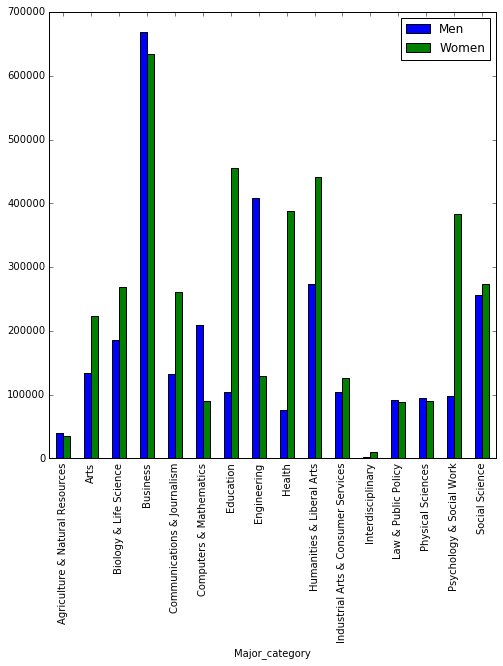

In [29]:
table.plot.bar(x="Major_category",y=["Men","Women"],figsize=(8,8))

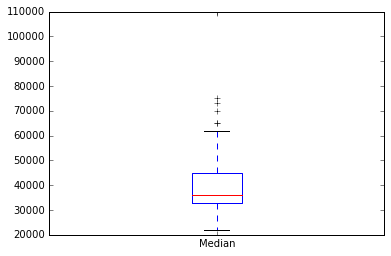

In [30]:
recent_grads[["Median"]].plot.box()

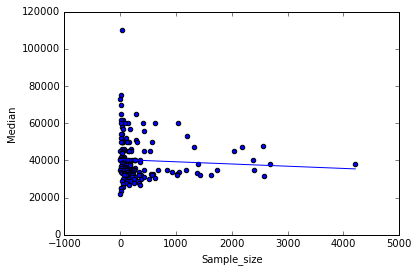

In [31]:
ax = recent_grads.plot.scatter(x="Sample_size", y="Median")

x = recent_grads["Sample_size"]
y = recent_grads["Median"]

u = np.unique(x)
pf = np.polyfit(x,y,1)
d = np.poly1d(pf)
plt.plot(u,(d)(u))

In [32]:
df = recent_grads.copy()

In [33]:
df[["Sample_size","Median"]].corr()

,Sample_size,Median
Sample_size,1.000000,-0.064475
Median,-0.064475,1.000000


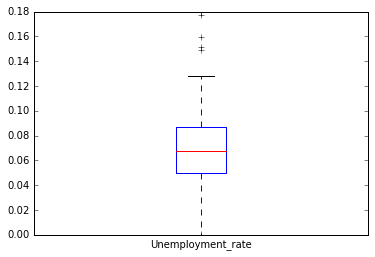

In [34]:
recent_grads[["Unemployment_rate"]].plot.box()

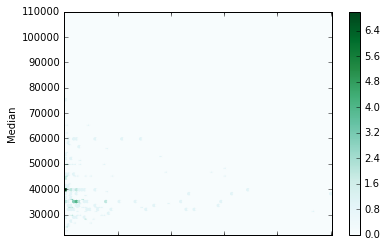

In [40]:
x = "Full_time"
y = "Median"

recent_grads.plot(x=x,y=y,kind="hexbin")